In [1]:
# Function for generating histogram
# Import Libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mlt
import datetime 

In [2]:
# This is to have a broader function that can get the data in the first place. (Datetime as well.)
def getData(year, directory, ASC, start_day, days, cols,datatype):
    for i in range(0, days):
        day = i + start_day
        year_str = '0.' + str(year)
        # File 
        if (day < 10):
            holdstr = 'pton00' + str(day) + year_str 
        elif (day < 100):
            holdstr ='pton0' + str(day) + year_str
        else: 
            holdstr = 'pton' + str(day) + year_str
        path = direct + holdstr + ASC
        if (day == start_day):
            data = np.array(np.loadtxt(path, dtype = datatype, skiprows = 1, usecols = cols))
        else: 
            hold = np.array(np.loadtxt(path, dtype = datatype, skiprows = 1, usecols = cols))
            data = np.concatenate((data, hold))
    return data

In [44]:
# Puts in the data that you have and returns precip events, nonprecip events, and total precip per precip event
def preciphist(data, minute, length, prec_duration, nonprec_duration):
    precipevent = np.zeros(length)
    nonprecip = np.zeros(length)
    preciptotal = np.zeros(length) # This is not intensity, but total precip per corresponding event.
    # This is to represent indices for the corresponding array from above
    prec = 0 # This represents both the precip events and total precip from precip events indices.
    nonprec = 0
    k = 0
    holdprec = 0 # These next three variables will hold the values, as we try to expand to include variable duration! 
    holdnonprec = 0
    holdtotal = 0
    while (k < minute):
        hold = data[k]
        # If there is no precipitation at a certain minute
        if (hold == 0):
            holdnonprec += 1
            # How to deal with previous precipitation event
            if (holdprec >= prec_duration):
                precipevent[prec] = holdprec
                preciptotal[prec] = holdtotal
                prec += 1
                holdprec = 0
                holdtotal = 0
                # How to deal with a short precip event between nonprecip events
            elif (holdprec < prec_duration):
                holdnonprec += holdprec
                holdprec = 0
        #if (k >= 1):
         #   holdbefore = data[k-1]
          #  if (hold != holdbefore and hold == 0 and holdbefore > 0):
           #     prec += 1
        
        # Condition where we have precipitation    
        if (hold > 0):
            holdprec += 1
            holdtotal += hold
            # How to deal with previous non-precipitation event 
            if (holdnonprec >= nonprec_duration):
                nonprecip[nonprec] = holdnonprec
                nonprec += 1
                holdnonprec = 0
            # How to deal with a short precip event between precip events
            elif (holdnonprec < nonprec_duration):
                holdprec += holdnonprec
                holdnonprec = 0
            # How to account for new precip events
            #if (k >= 1):
             #   holdbefore = data[k-1]
              #  # Don't iterate prec if it is the first precip event
               # if (hold != holdbefore and hold > 0 and holdbefore == 0):
                #    nonprec += 1
        k = k+1
    return precipevent, nonprecip, preciptotal

In [4]:
def hist_plots(array,bin_spec, range_tup, xlabel, ylabel, title, log, fig_size, color):
    plt.figure(figsize = fig_size)
    plt.hist(array[array != 0], bins = bin_spec, range= range_tup, log = log, color = color)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)

In [5]:
ASC = '__ASC_ASCIIIn.mrk'
direct = 'C:/Users/tyron/Documents/Geoscience/weather/'
data = getData(19, direct, ASC, 1, 365,6, float)


In [12]:
print(data2019)

[0. 0. 0. ... 0. 0. 0.]


In [45]:
precip, nonprecip, preciptotal= preciphist(data, len(data), 20000, 5, 5) 

In [46]:
len(data2019)

525586

In [47]:
count0 = 0 
for i in range(0, 20000):
    if precip2019[i] == 0:
        count0 +=1

In [48]:
print(count0)

18938


In [49]:
newlength = 20000 - count0 
print(newlength)

1062


In [50]:
count1 = 0 
for i in range(0, 20000):
    if nonprecip2019[i] == 0:
        count1 +=1
print(count1)

18502


In [51]:
newlength2 = 20000 - count1
print(newlength2)
print(nonprecip2019[:newlength2])

1498
[11. 52. 13. ... 70.  7. 19.]


In [52]:
print(precip2019[:1062])

[ 9. 48. 71. ...  6.  7.  6.]


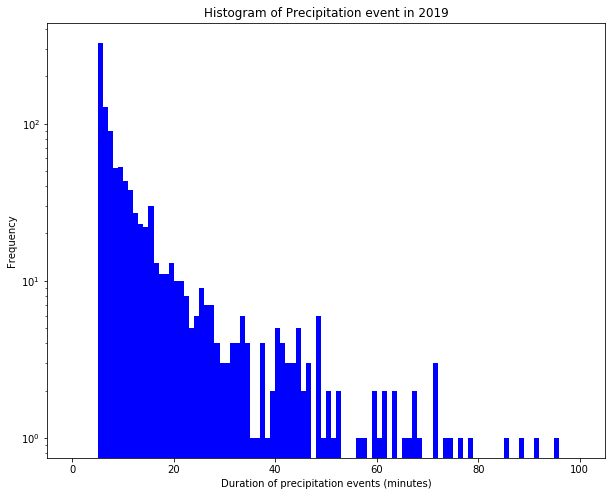

In [53]:
hist_plots(precip2019[:1062], 100, (0, 100), 'Duration of precipitation events (minutes)', 'Frequency', 'Histogram of 5 minute and bigger Precipitation event in 2019', True, (10,8), 'b')

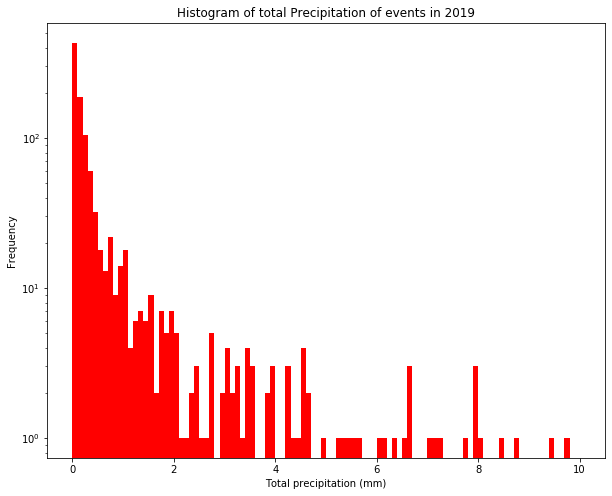

In [54]:
hist_plots(preciptotal2019[:1062], 100, (0, 10), 'Total precipitation (mm)', 'Frequency', 'Histogram of total Precipitation of events in 2019', True, (10,8),'r')

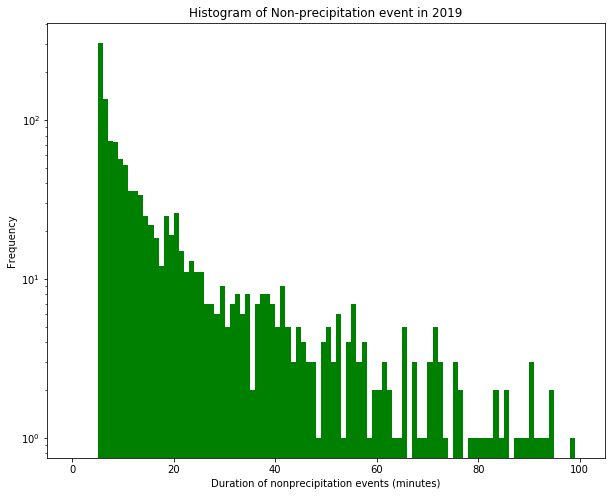

In [55]:
hist_plots(nonprecip2019[:newlength2], 100, (0, 100), 'Duration of nonprecipitation events (minutes)', 'Frequency', 'Histogram of Non-precipitation event in 2019', True, (10,8), 'g' )

In [56]:
inten2019 = np.divide(preciptotal2019[:1062], precip2019[:1062])

In [57]:
print(inten2019)

[0.01222222 0.07208333 0.09985915 ... 0.00666667 0.03285714 0.01333333]


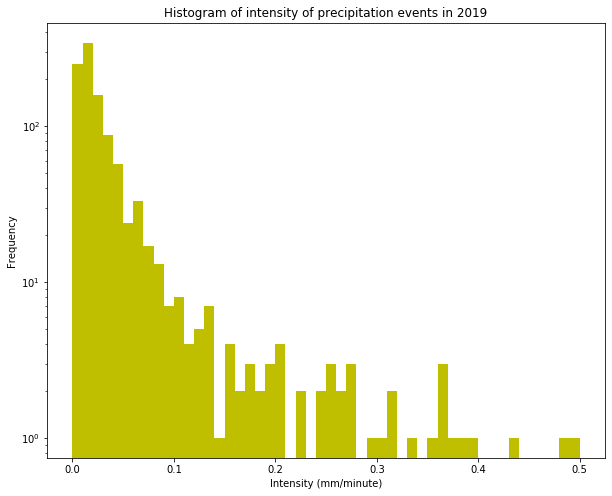

In [68]:
hist_plots(inten2019, 50, (0, 0.5), 'Intensity (mm/minute)', 'Frequency', 'Histogram of intensity of precipitation events in 2019', True, (10,8),'y')

In [59]:
precip_2019, nonprecip_2019, preciptotal_2019 = preciphist(data2019, len(data2019), 20000, 1, 1) 

In [60]:
count_0 = 0 
for i in range(0, 20000):
    if precip_2019[i] == 0:
        count_0 +=1
print(count_0)

16878


In [61]:
count_1 = 0
for i in range(0, 20000):
    if nonprecip_2019[i] == 0:
        count_1 +=1

In [62]:
print(count_1)

16878


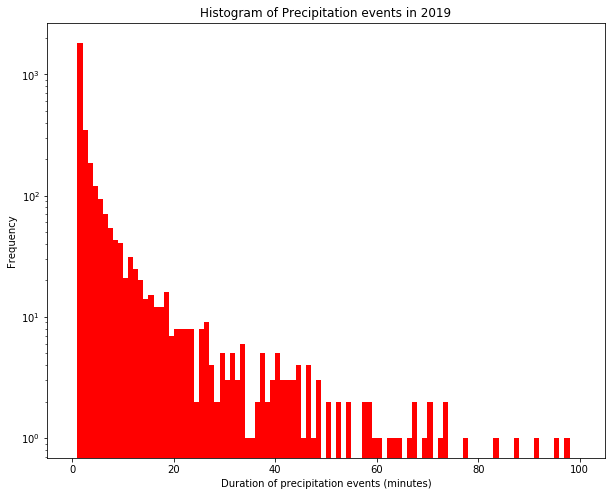

In [69]:
newlength_0 = 20000 - count_0
newlength_1 = 20000 - count_1
hist_plots(precip_2019[:newlength_0], 100, (0, 100), 'Duration of precipitation events (minutes)', 'Frequency', 'Histogram of Precipitation events in 2019', True, (10,8), 'r')

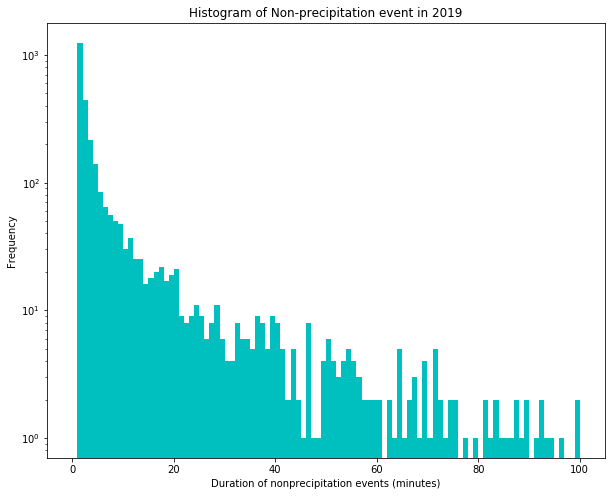

In [71]:
hist_plots(nonprecip_2019[:newlength_1], 100, (0, 100), 'Duration of nonprecipitation events (minutes)', 'Frequency', 'Histogram of Non-precipitation event in 2019', True, (10,8), 'c' )

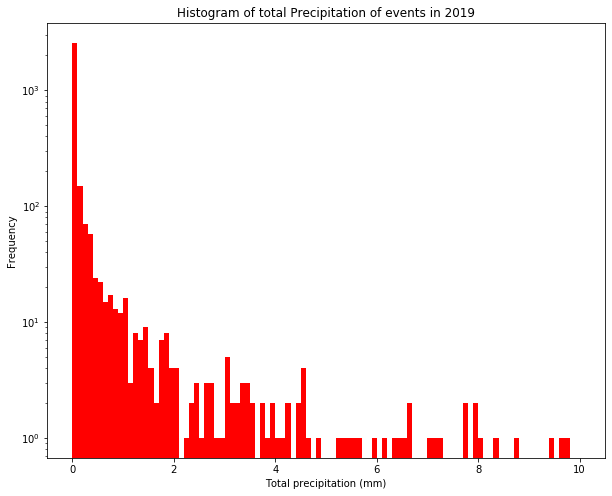

In [65]:
hist_plots(preciptotal_2019[:newlength_0], 100, (0, 10), 'Total precipitation (mm)', 'Frequency', 'Histogram of total Precipitation of events in 2019', True, (10,8),'r')

In [66]:
inten_2019 = np.divide(preciptotal_2019[:newlength_0], precip_2019[:newlength_0])
print(inten_2019)

[0.01       0.01428571 0.01       ... 0.01       0.02       0.01      ]


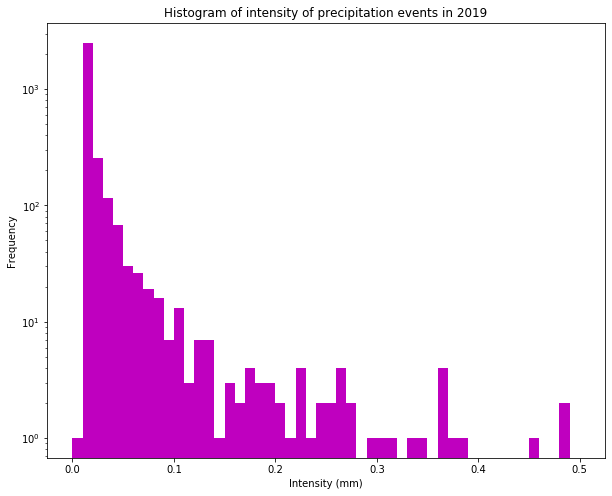

In [70]:
hist_plots(inten_2019, 50, (0, 0.5), 'Intensity (mm)', 'Frequency', 'Histogram of intensity of precipitation events in 2019', True, (10,8),'m')